In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

In [2]:
#Add your file path here
stock_path = os.path.join("Resources","FB_daily_stock_yahoo.csv")
employee_reviews_path = os.path.join("Resources","employee_reviews.csv")

## Facebook Stock Data 

In [3]:
stock = pd.read_csv(stock_path)
stock_price=stock[['Date','Close']]
stock_price.head()

,Date,Close
0,2017-01-03,116.860001
1,2017-01-04,118.690002
2,2017-01-05,120.669998
3,2017-01-06,123.410004
4,2017-01-09,124.900002


In [4]:
#Get the average stock price per month
stock["YYYY-MM"] = [x[:7] for x in stock["Date"]]
stock_grouped = stock.groupby("YYYY-MM")
stock_monthly = pd.DataFrame(stock_grouped["Close"].mean())
stock_monthly["Year Month"] = pd.to_datetime(stock_monthly.index)
stock_monthly.head()

,Close,Year Month
YYYY-MM,,
2017-01,126.817499,2017-01-01
2017-02,133.830525,2017-02-01
2017-03,139.408261,2017-03-01
2017-04,142.965263,2017-04-01
2017-05,150.234093,2017-05-01


In [5]:
employment="employmentrates.csv"
employment_rate = pd.read_csv(employment)

In [6]:
employment_rate=employment_rate.loc[employment_rate['SUBJECT']=='LREM64TT']
employment_rate["Time"] = pd.to_datetime(employment_rate["Time"])
employment=employment_rate.rename(columns={"Time":"Year Month","Value":"Employment Rate" })
employment.head(40)

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Year Month,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Employment Rate,Flag Codes,Flags
74,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2016-01,2016-01-01,PC,Percentage,0,Units,NaN,NaN,69.19092,NaN,NaN
75,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2016-02,2016-02-01,PC,Percentage,0,Units,NaN,NaN,69.29377,NaN,NaN
76,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2016-03,2016-03-01,PC,Percentage,0,Units,NaN,NaN,69.32307,NaN,NaN
77,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2016-04,2016-04-01,PC,Percentage,0,Units,NaN,NaN,69.16882,NaN,NaN
78,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2016-05,2016-05-01,PC,Percentage,0,Units,NaN,NaN,69.27267,NaN,NaN
79,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2016-06,2016-06-01,PC,Percentage,0,Units,NaN,NaN,69.20770,NaN,NaN
80,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2016-07,2016-07-01,PC,Percentage,0,Units,NaN,NaN,69.28469,NaN,NaN
81,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2016-08,2016-08-01,PC,Percentage,0,Units,NaN,NaN,69.40480,NaN,NaN
82,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2016-09,2016-09-01,PC,Percentage,0,Units,NaN,NaN,69.43314,NaN,NaN
83,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2016-10,2016-10-01,PC,Percentage,0,Units,NaN,NaN,69.45699,NaN,NaN


In [7]:
combined_data=pd.merge(employment,stock_monthly,on='Year Month', how='inner')
combined_data.head()

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Year Month,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Employment Rate,Flag Codes,Flags,Close
0,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2017-01,2017-01-01,PC,Percentage,0,Units,NaN,NaN,69.65945,NaN,NaN,126.817499
1,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2017-02,2017-02-01,PC,Percentage,0,Units,NaN,NaN,69.76285,NaN,NaN,133.830525
2,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2017-03,2017-03-01,PC,Percentage,0,Units,NaN,NaN,70.03338,NaN,NaN,139.408261
3,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2017-04,2017-04-01,PC,Percentage,0,Units,NaN,NaN,70.09789,NaN,NaN,142.965263
4,USA,United States,LREM64TT,"Employment rate, Aged 15-64, All persons",STSA,"Level, rate or quantity series, s.a.",M,Monthly,2017-05,2017-05-01,PC,Percentage,0,Units,NaN,NaN,69.97665,NaN,NaN,150.234093


In [8]:
employment_and_interest=combined_data[['Year Month','Employment Rate','Close']]
employment_and_interest.head(27)

,Year Month,Employment Rate,Close
0,2017-01-01,69.65945,126.817499
1,2017-02-01,69.76285,133.830525
2,2017-03-01,70.03338,139.408261
3,2017-04-01,70.09789,142.965263
4,2017-05-01,69.97665,150.234093
5,2017-06-01,70.09774,152.079545
6,2017-07-01,70.15578,160.532499
7,2017-08-01,70.17014,169.160000
8,2017-09-01,70.47729,170.591000
9,2017-10-01,70.29904,173.306820


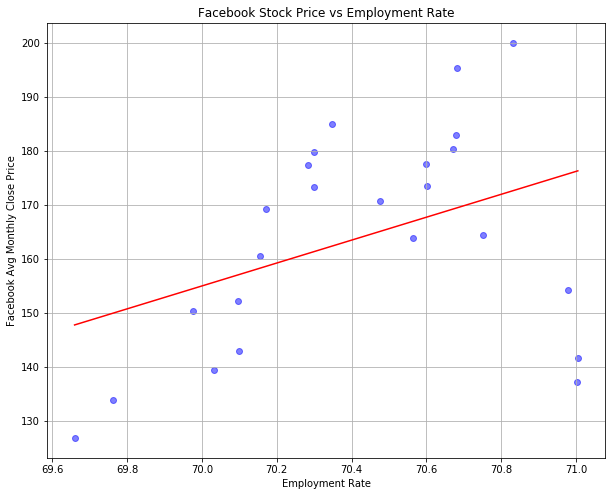

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(employment_and_interest["Employment Rate"], employment_and_interest["Close"], color='b', alpha=0.5)
plt.grid()
plt.xlabel('Employment Rate')
plt.ylabel('Facebook Avg Monthly Close Price')
plt.title('Facebook Stock Price vs Employment Rate')
plt.plot(np.unique(employment_and_interest["Employment Rate"]), np.poly1d(np.polyfit(employment_and_interest["Employment Rate"],employment_and_interest["Close"] , 1))(np.unique(employment_and_interest["Employment Rate"])), color = "red")
plt.show()

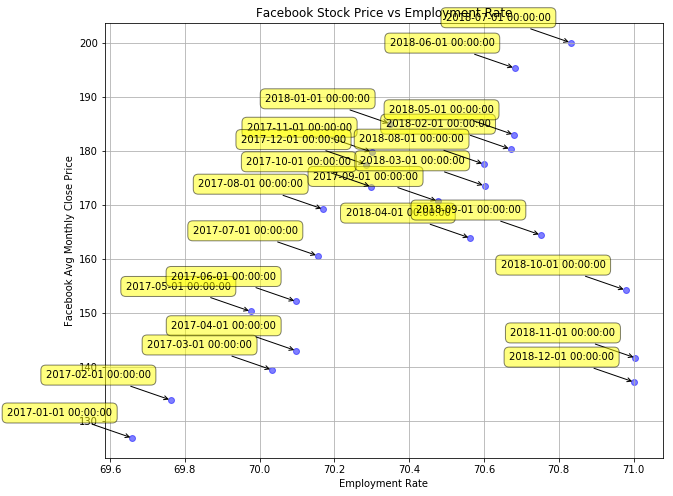

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(employment_and_interest["Employment Rate"], employment_and_interest["Close"], color='b', alpha=0.5)
plt.grid()
plt.xlabel('Employment Rate')
plt.ylabel('Facebook Avg Monthly Close Price')
plt.title('Facebook Stock Price vs Employment Rate')

for label, x, y in zip(employment_and_interest["Year Month"], employment_and_interest["Employment Rate"], employment_and_interest["Close"]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

In [ ]:
trump="trump.csv"
trump_approval = pd.read_csv(trump)
trump_approval.head(20)

In [ ]:
trump_gallup=trump_approval.loc[trump_approval['survey_organization']=='Gallup']
trump_ratings=trump_gallup[["end_date","approve_percent"]]
trump_disapproval=trump_ratings.rename(columns={"end_date":"Date","approve_percent":"Approval Percentage" })
trump_disapproval.head()

In [ ]:
combined=pd.merge(trump_disapproval,stock_price,on='Date', how='inner')
combined.head(40)

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(combined["Approval Percentage"], combined["Close"], color='b', alpha=0.5)
plt.grid()
plt.xlabel('Trump Approval Rate')
plt.ylabel('Facebook Avg Monthly Close Price')
plt.title('Facebook Stock Price vs Trump Approval Rate')
plt.plot(np.unique(combined["Approval Percentage"]), np.poly1d(np.polyfit(combined["Approval Percentage"],combined["Close"] , 1))(np.unique(combined["Approval Percentage"])), color = "red")
plt.show()